Looking at data colleted from the 24th of July from WM1 e m506 (normal mounted) 

In [ ]:
#TODO check the TRS compass and consider to rotate

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
#matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
sns.set()
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (16,10)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_20200724_final_field_install/processed")

wm1_path = proc_dir / "eddypro_WM1_full_output_2020-07-25T162118_exp.csv"
m6_path = proc_dir / "eddypro_TRS_m506_full_output_2020-07-25T163113_exp.csv"
# m7_path = proc_dir / "eddypro_TRS_m507_full_output_2020-07-23T115628_exp.csv"

wm1_2m_path = proc_dir / "eddypro_WM1_2min_full_output_2020-07-25T165206_exp.csv"
m6_2m_path = proc_dir / "eddypro_TRS_m506_2m_full_output_2020-07-25T163721_exp.csv" 

cache_dir = Path("data_cache")
start_date = '2020-07-24 13:00:00'
end_date = '2020-07-25 16:00:00'

wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w'}

In [ ]:
wm1, m6, wm1_2m, m6_2m = map(
    lambda p: load_ep_cache(p, cache_dir= cache_dir)
    .loc[start_date:end_date]
    .loc[:,wind_cols]
    .rename(columns=wind_comp_rename),
    [wm1_path, m6_path, wm1_2m_path, m6_2m_path])

## Exploration plots

In [ ]:
wm1

u         v         w  wind_speed  wind_dir
date_time                                                              
2020-07-24 13:05:00 -1.130710 -1.587330 -0.143263    1.954140  309.6080
2020-07-24 13:10:00 -0.718523 -0.957160 -0.188460    1.211590  309.9680
2020-07-24 13:15:00 -0.693623 -0.437435 -0.155810    0.834709  332.2910
2020-07-24 13:20:00 -1.235950 -1.686180 -0.085213    2.092380  311.9320
2020-07-24 13:25:00 -1.272670 -1.400080 -0.057970    1.892950  310.9410
...                       ...       ...       ...         ...       ...
2020-07-25 15:40:00 -0.290060  1.376460  0.210923    1.422420   78.3966
2020-07-25 15:45:00 -0.086750  1.408280  0.118653    1.415930   92.7394
2020-07-25 15:50:00 -0.154887  1.491160  0.130233    1.504830   85.3069
2020-07-25 15:55:00  0.737373  0.782010  0.113177    1.080770  129.4270
2020-07-25 16:00:00 -0.287320  0.981630  0.238533    1.050260   75.4313

[324 rows x 5 columns]

In [ ]:
m6

u         v         w  wind_speed  wind_dir
date_time                                                              
2020-07-24 13:05:00 -1.968000  0.845975  0.130170    2.146840   20.3356
2020-07-24 13:10:00 -1.264800  0.622008  0.103127    1.413240   28.4723
2020-07-24 13:15:00 -0.900795  0.209717  0.111703    0.931606   11.8376
2020-07-24 13:20:00 -2.015820  0.814257  0.144690    2.178870   18.1855
2020-07-24 13:25:00 -1.989890  0.518918  0.166437    2.063170   16.3622
...                       ...       ...       ...         ...       ...
2020-07-25 10:40:00  0.627597 -1.562870  0.118122    1.688310  247.8450
2020-07-25 10:45:00  1.312750 -0.696480  0.126273    1.491430  204.3600
2020-07-25 10:50:00  0.484125 -0.244858  0.110140    0.553591  193.3660
2020-07-25 10:55:00  0.842292 -0.837793  0.173893    1.200660  225.7520
2020-07-25 11:00:00  0.368302 -0.666558  0.109450    0.769367  239.1480

[264 rows x 5 columns]

<AxesSubplot:xlabel='date_time'>

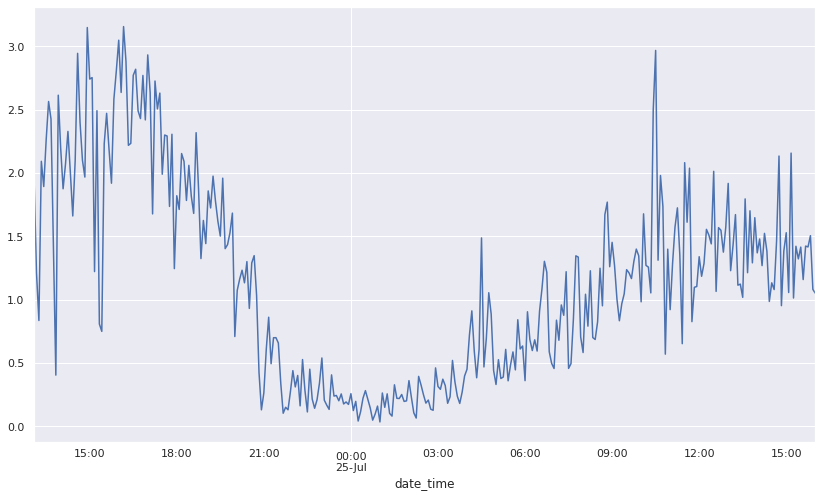

In [ ]:
wm1.wind_speed.plot()

<AxesSubplot:xlabel='date_time'>

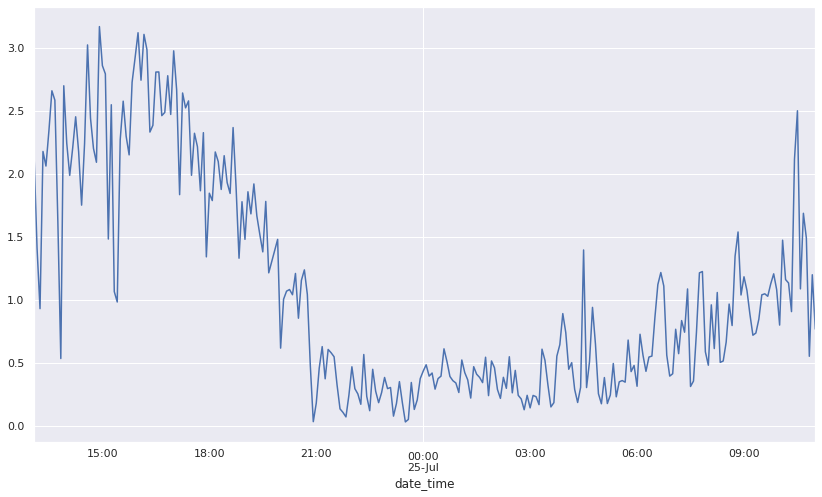

In [ ]:
m6.wind_speed.plot()

In [ ]:
px.line(wm1, y="wind_speed")

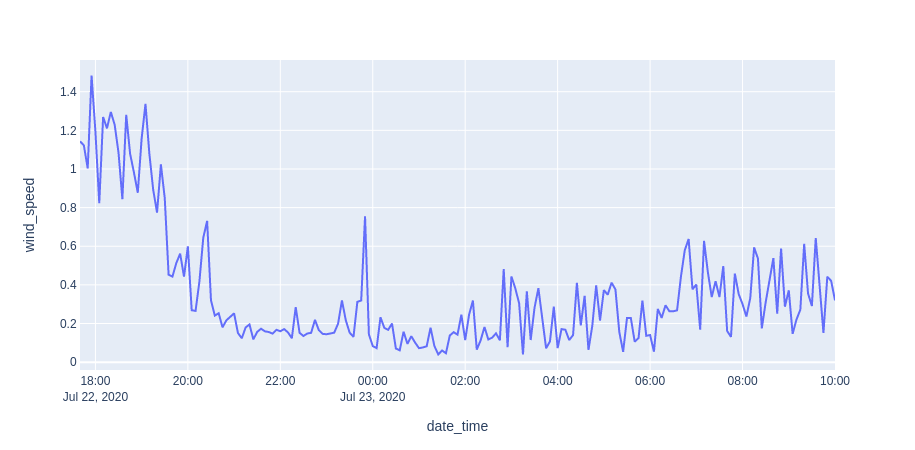

In [ ]:
px.line(m7, y="wind_speed")

<AxesSubplot:xlabel='date_time'>

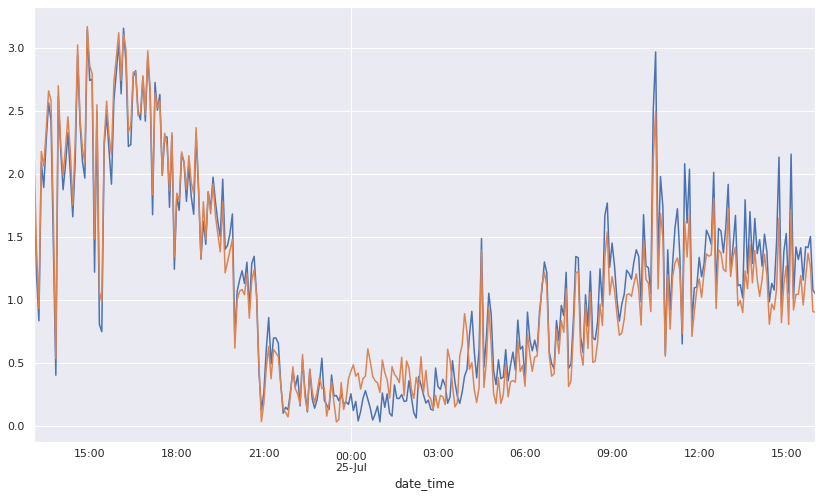

In [ ]:
wm1.wind_speed.plot()
m6.wind_speed.plot()

<AxesSubplot:xlabel='date_time'>

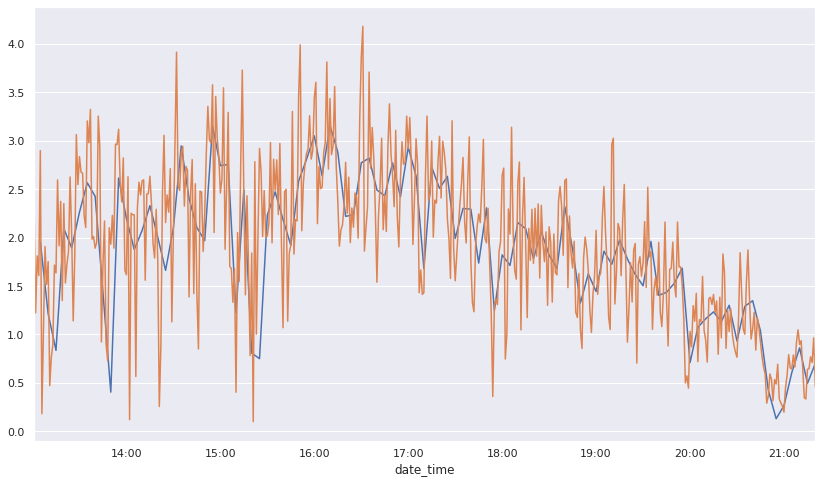

In [ ]:
wm1[: 100].wind_speed.plot()
wm1_1m[:500].wind_speed.plot()

In [ ]:
m6inv = m6.copy()
m6inv.v = - m6inv.v

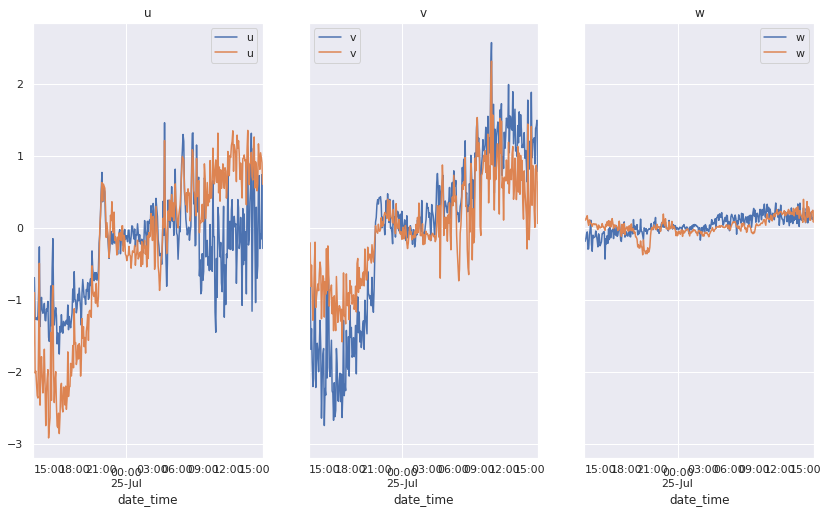

In [ ]:
plot_components([wm1, m6inv])

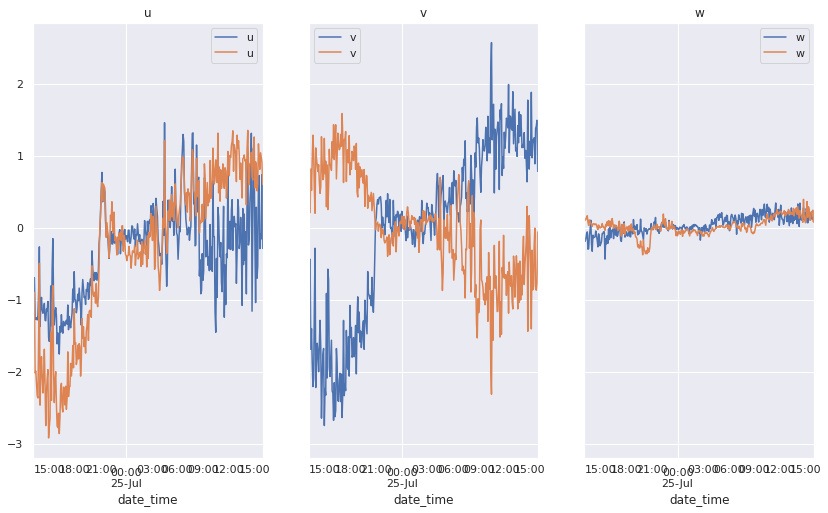

In [ ]:
plot_components([wm1, m6])

In [ ]:
plot_components([wm1, m6])

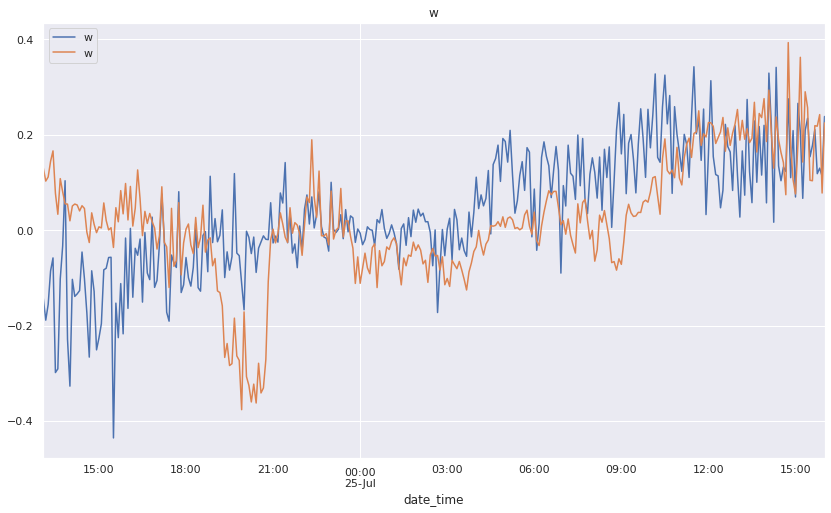

In [ ]:
plot_components([wm1, m6], 'w')

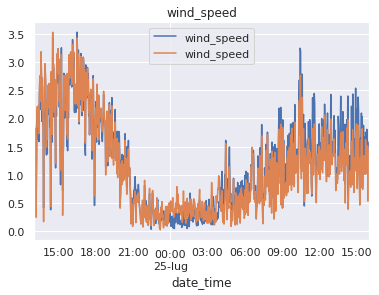

In [ ]:
plot_components([wm1_2m, m6_2m], ('wind_speed',))

## Rotate components of wm1

In [ ]:
def rotate_wind_ang(df, ang):
    df = df.copy()
    wind_dir, wind_speed = cart2pol(df.u, df.v)
    wind_dir += np.deg2rad(ang)
    df.u, df.v = pol2cart(wind_dir, wind_speed)
    return df

In [ ]:
wm1r = rotate_wind_ang(wm1, 310)

In [ ]:
wm1r

u         v         w  wind_speed  wind_dir
date_time                                                              
2020-07-24 13:05:00 -1.942772 -0.154142 -0.143263    1.954140  309.6080
2020-07-24 13:10:00 -1.195085 -0.064830 -0.188460    1.211590  309.9680
2020-07-24 13:15:00 -0.780947  0.250168 -0.155810    0.834709  332.2910
2020-07-24 13:20:00 -2.086142 -0.137063 -0.085213    2.092380  311.9320
2020-07-24 13:25:00 -1.890580  0.074968 -0.057970    1.892950  310.9410
...                       ...       ...       ...         ...       ...
2020-07-25 15:40:00  0.867983  1.106970  0.210923    1.422420   78.3966
2020-07-25 15:45:00  1.023043  0.971679  0.118653    1.415930   92.7394
2020-07-25 15:50:00  1.042735  1.077149  0.130233    1.504830   85.3069
2020-07-25 15:55:00  1.073029 -0.062194  0.113177    1.080770  129.4270
2020-07-25 16:00:00  0.567286  0.851079  0.238533    1.050260   75.4313

[324 rows x 5 columns]

### checking that the rotation is right comparing with EP wind direction

In [ ]:
add_wind_

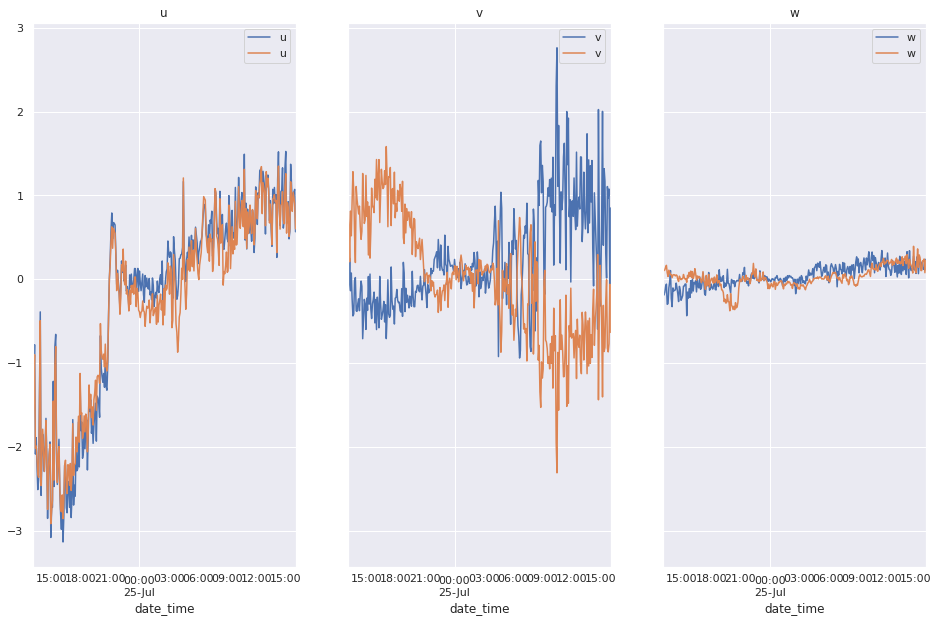

In [ ]:
plot_components([wm1r, m6])

In [ ]:
m6r = rotate_wind_ang(m6, -20)

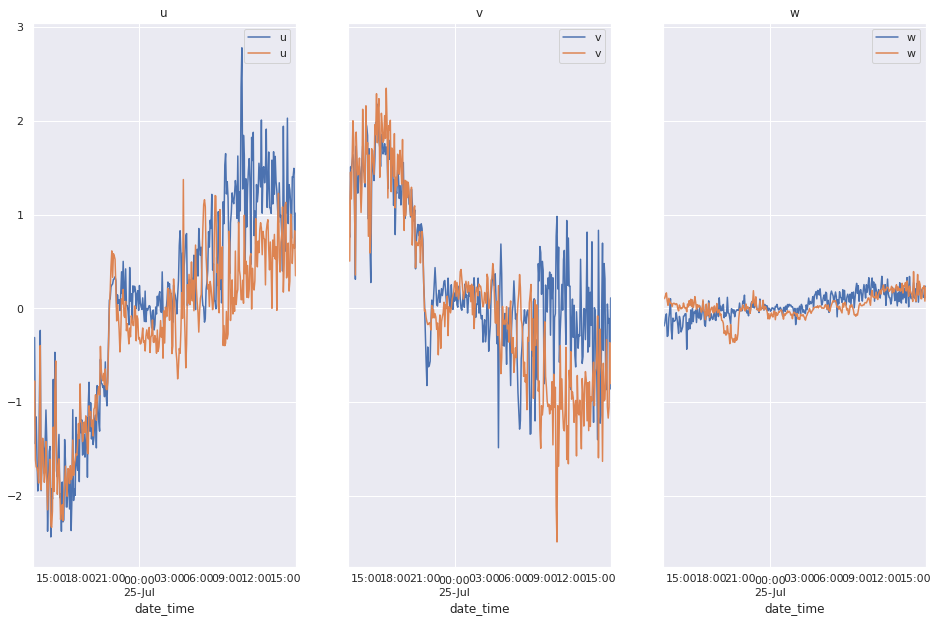

In [ ]:
plot_components([wm1r, m6r])

In [ ]:
wm12mr = rotate_wind_ang(wm1_2m, 310)

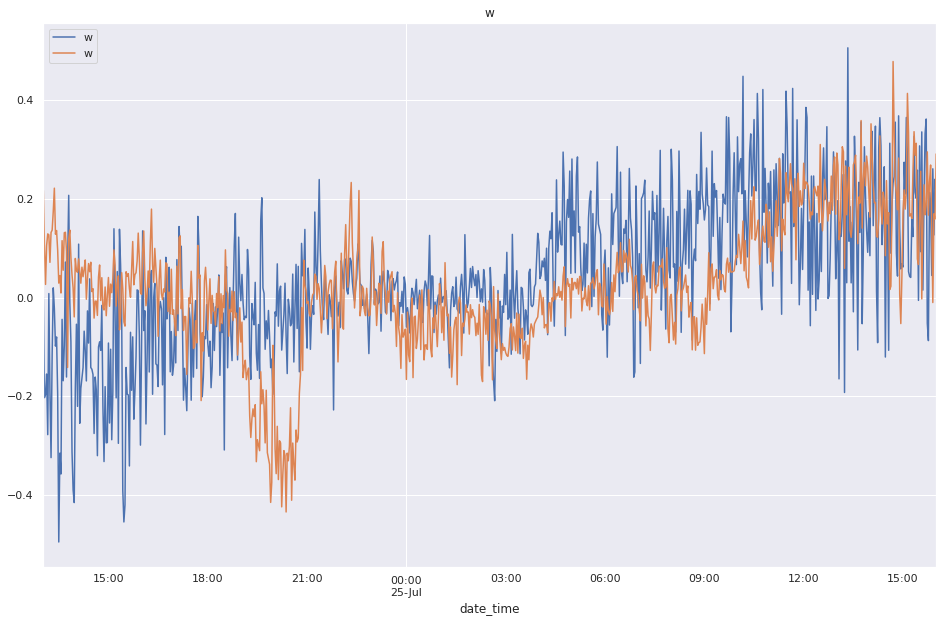

In [ ]:
plot_components([wm12mr, m6_2m], 'w')

<AxesSubplot:xlabel='date_time'>

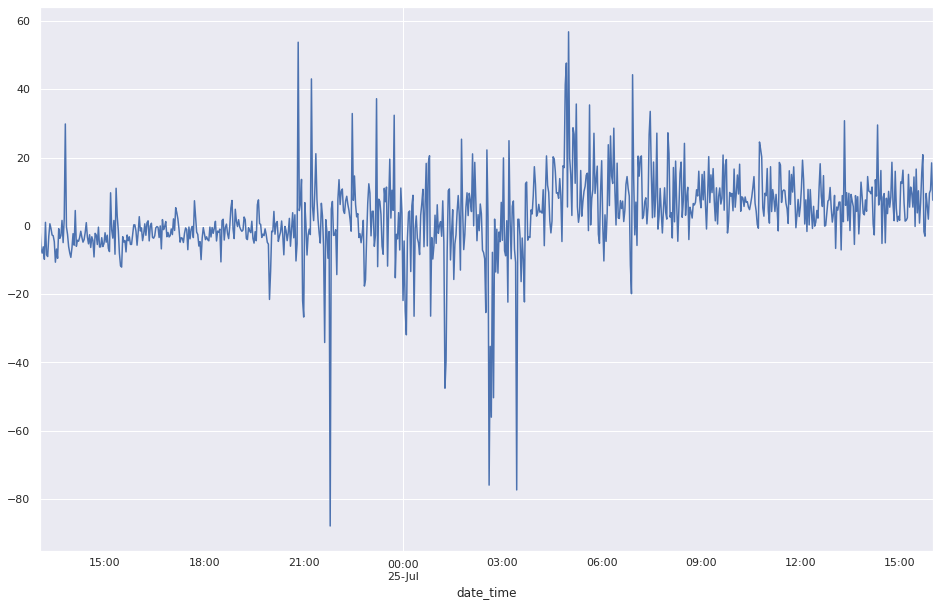

In [ ]:
add_angle_attack(wm1_2m).angle_attack.plot()

# Explore direction

<AxesSubplot:xlabel='date_time'>

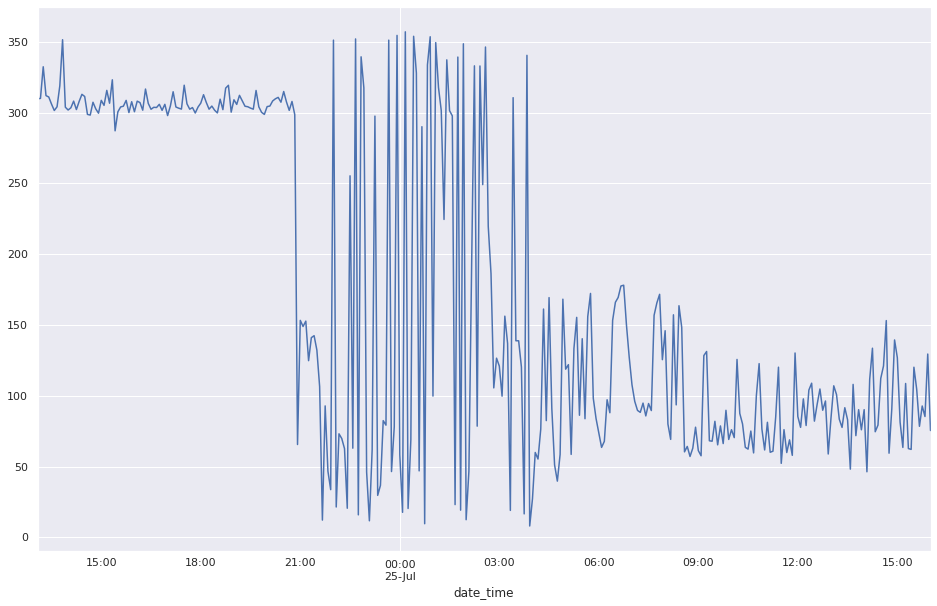

In [ ]:
wm1.wind_dir.plot()

<AxesSubplot:xlabel='date_time'>

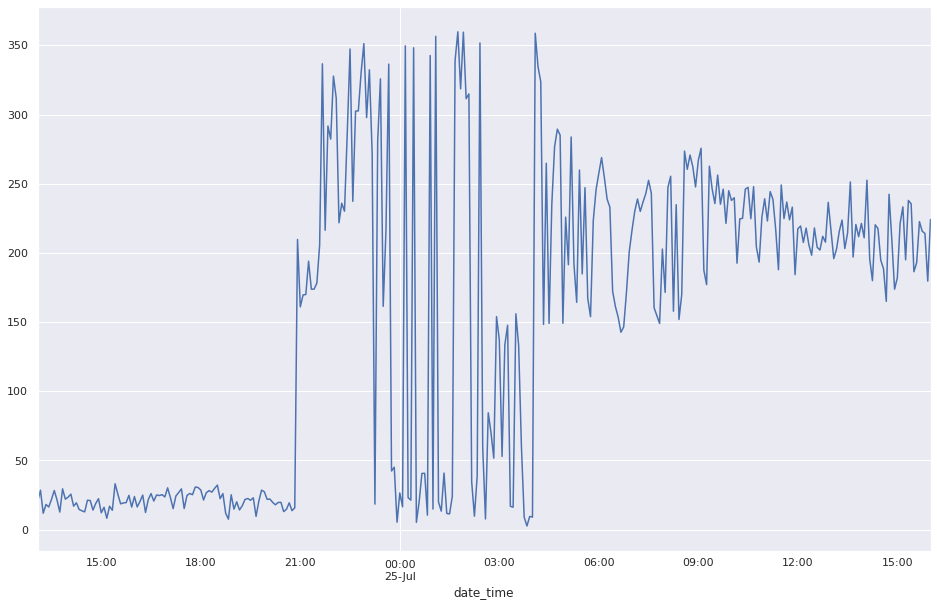

In [ ]:
m6.wind_dir.plot()

<AxesSubplot:xlabel='date_time'>

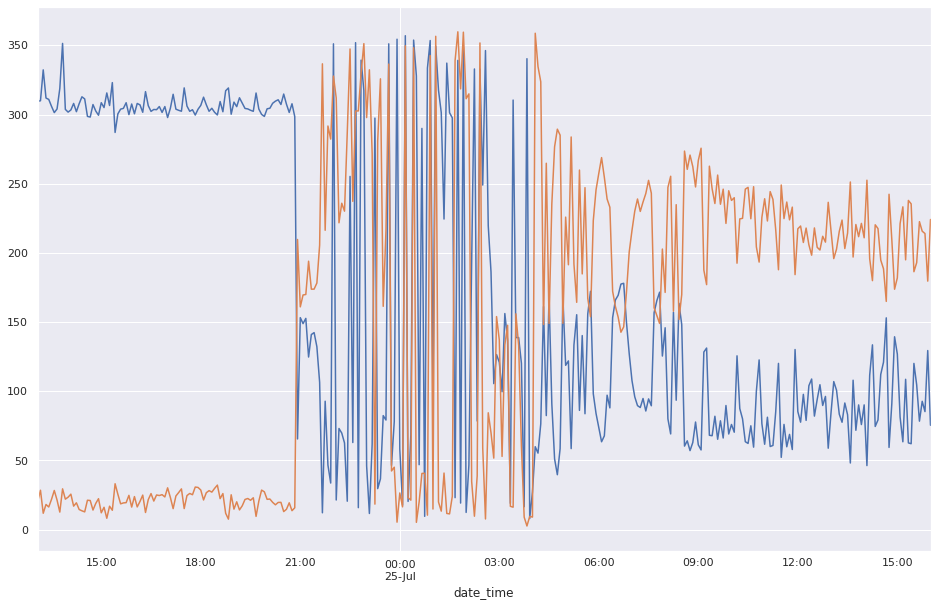

In [ ]:
wm1.wind_dir.plot()
m6.wind_dir.plot()

In [ ]:
# trying to add the trisonica measured offset

In [ ]:
inv_dir = (-m6.wind_dir)% 360

<AxesSubplot:xlabel='date_time'>

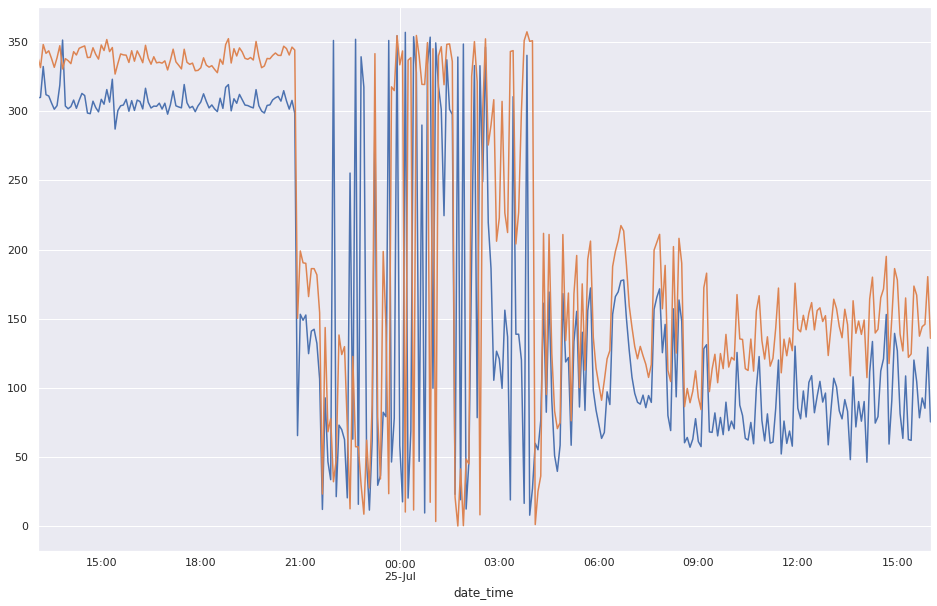

In [ ]:
wm1.wind_dir.plot()
inv_dir.plot()

In [ ]:
inv_dir_off = (-m6.wind_dir -27 )% 360

<AxesSubplot:xlabel='date_time'>

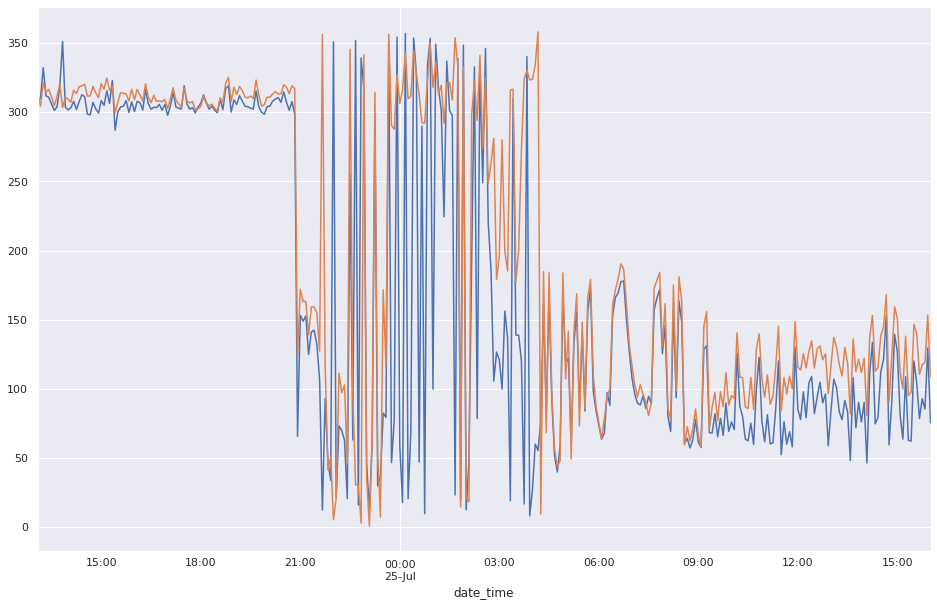

In [ ]:
wm1.wind_dir.plot()
inv_dir_off.plot()

In [ ]:
380 % 360

20